In [1]:
from ast import increment_lineno
import os
import cv2
# import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

# from moviepy.editor import *
%matplotlib inline
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from moviepy import VideoFileClip

In [7]:
!pwd

/Users/durbadalbhowmik/Mini Project


In [9]:
import zipfile

zip_file = "Real_Life_Violence_Nonviolence_Dataset2.zip"
extract_path = "Violence_Dataset"

with zipfile.ZipFile(zip_file,'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction completed successfully!")

Extraction completed successfully!


In [11]:
path = "Violence_Dataset"
if os.path.exists(path):
    print("Path exists!")
else:
    print("path does not exist!")

Path exists!


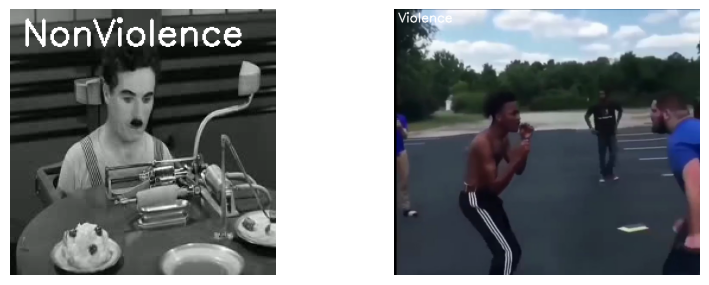

In [13]:
#Specify the size of the data or figure
plt.figure(figsize=(20, 20))

# Get the names of all classes in UCF50
dataset_path = 'Violence_Dataset/Real_Life_Violence_Dataset'  # Ensure correct path
all_classes_names = os.listdir(dataset_path)

# Generate 2 random class indices
random_range = random.sample(range(len(all_classes_names)), 2)

# Loop through selected classes
for counter, random_index in enumerate(random_range, 1):
    selected_class_name = all_classes_names[random_index]

    video_files_path = f"{dataset_path}/{selected_class_name}"
    video_files_names_list = os.listdir(video_files_path)

    selected_video_file_name = random.choice(video_files_names_list)

    video_reader = cv2.VideoCapture(f"{video_files_path}/{selected_video_file_name}")

    # Read the first frame
    ret, bgr_frame = video_reader.read()
    video_reader.release()  # Release the VideoCapture object

    if not ret:
        print(f"Error reading video: {selected_video_file_name}")
        continue  # Skip to the next video

    # Apply text annotation BEFORE converting color
    cv2.putText(bgr_frame, selected_class_name, (10, 30), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # Convert BGR to RGB
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Display frame
    plt.subplot(5, 4, counter)
    plt.imshow(rgb_frame)
    plt.axis('off')

# Show all images after loop
plt.show()


In [15]:
# Specify the height and width to which each video frame will be resized
IMAGE_HEIGHT, IMAGE_WIDTH = 64, 64

# Specify the number of frames per sequence
SEQUENCE_LENGTH = 20

# Correct dataset directory path (Ensure it's correct on macOS)
DATASET_DIR = "Violence_Dataset/Real_Life_Violence_Dataset"

# Ensure class names match the actual folder names in the dataset
CLASSES_LIST = ["Violence", "NonViolence"]

In [1]:
def frames_extraction(video_path):
  '''
  This function will extract the required frames from a video after resizing and normalizing them.
  Args:
    video_path: The path of the video in the disk, whose frames are to be extracted.
    Returns:
      frames_list: A list containing the resized and normalized frames of the video.
  '''
  # Declare the list to store video frames
  frames_list=[]

  # Read the video file using the VideoCapture object
  video_reader=cv2.VideoCapture(video_path)

  # Get the total no. of frames in the video
  video_frames_count=int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

  # Calculate the interval after which frames will be added to the list
  skip_frames_window=max(int(video_frames_count/SEQUENCE_LENGTH),1)

  # Iterate through the Video Frames
  for frame_counter in range(SEQUENCE_LENGTH):
    # Set the current frame position of the video
    video_reader.set(cv2.CAP_PROP_POS_FRAMES,frame_counter*skip_frames_window)

    # Reading the frame from the video
    success,frame=video_reader.read()

    #Check if video frame is not successfully read then break the loop
    if not success:
      break

    # Resize the Frame to fixed height and width
    resized_frame=cv2.resize(frame,(IMAGE_HEIGHT,IMAGE_WIDTH))

    # Normalize the resized frame by dividing it with 255 so that each pixel value then lies 0 and 1
    normalized_frame=resized_frame/255

    #Append the normalized into the frames list
    frames_list.append(normalized_frame)

 #Release the videocapture object
  video_reader.release()

  # Return the frames list
  return frames_list

In [3]:
def create_dataset():
  '''
  This function will extract the data of the selected classes and create the required dataset
  return
     features: A list containing the extracted frames of the videos.
     labels: A list containing the indexes of the classes associated with the videos.
     video files paths: A list containing the paths of the videos in the desk
  '''
  # Declared the empty lists to store the features,labels, and video file path valus.
  features=[]
  labels=[]
  video_files_paths=[]

  # Iterating through all the classes mentioned in the classes list
  for class_index, class_name in enumerate(CLASSES_LIST):

    print(f'Extracting Data of Class: {class_name}')

    # Getting the list of video files present in the specific class name directory
    files_list=os.listdir(os.path.join(DATASET_DIR,class_name))

    # Iterating through all the files present in the files list
    for file_name in files_list:

        #Get the complete video path
        video_files_path=os.path.join(DATASET_DIR,class_name,file_name)

        #Extract the frames of the video files
        frames=frames_extraction(video_files_path)

        # Check if the extracted frames are equal to the SEQUENCE_LEGNTH specified above
        #So ignore the videos having frames less than the SEQUENCE_LENGTH
        if(len(frames)==SEQUENCE_LENGTH):

          #Append the data to their respective lists
          features.append(frames)
          labels.append(class_index)
          video_files_paths.append(video_files_path)


   # Converting the list to numpy arrays
  features=np.asarray(features)
  labels=np.array(labels)

    # Return the frames, class index, and video file path.
  return features,labels,video_files_paths

In [21]:
# Create the dataset
features, labels, video_files_paths = create_dataset()
print(f"✅ Dataset created with {len(features)} videos.")

Extracting Data of Class: Violence
Extracting Data of Class: NonViolence


[h264 @ 0x10606d640] mb_type 104 in P slice too large at 98 31
[h264 @ 0x10606d640] error while decoding MB 98 31
[h264 @ 0x10606d640] mb_type 104 in P slice too large at 98 31
[h264 @ 0x10606d640] error while decoding MB 98 31
[h264 @ 0x10606d640] mb_type 104 in P slice too large at 98 31
[h264 @ 0x10606d640] error while decoding MB 98 31
[h264 @ 0x10606d640] mb_type 104 in P slice too large at 98 31
[h264 @ 0x10606d640] error while decoding MB 98 31
[h264 @ 0x10606d640] mb_type 104 in P slice too large at 98 31
[h264 @ 0x10606d640] error while decoding MB 98 31


✅ Dataset created with 2000 videos.


In [22]:
# Using Keras's to_categorical method to convert labels into one hot encoded vectors
one_hot_eocoded_labels=to_categorical(labels)

In [25]:
# Split the data into Train (75%) and Test Set (25%)
seed_constant=23
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)
features_train,features_test,labels_train,labels_test=train_test_split(features,one_hot_eocoded_labels,
                                                                       test_size=0.25,shuffle=True,random_state=seed_constant)

In [27]:
def create_convlstm_model():
  '''
  This function will construct the required convlstm model.
  Returns:
   Model:It is the required constructed convlstm model.
  '''

  # We will use a Sequential model for model construction
  model=Sequential()

  # Model Architecture
  model.add(ConvLSTM2D(filters=4,kernel_size=(3,3),activation='tanh',data_format="channels_last",
                       recurrent_dropout=0.2,return_sequences=True, input_shape=(SEQUENCE_LENGTH,IMAGE_HEIGHT,IMAGE_WIDTH,3)))
  model.add(MaxPooling3D(pool_size=(1,2,2), padding='same',data_format='channels_last'))
  model.add(TimeDistributed(Dropout(0.2)))

  model.add(ConvLSTM2D(filters=8,kernel_size=(3,3),activation='tanh',data_format="channels_last",
                       recurrent_dropout=0.2,return_sequences=True))
  model.add(MaxPooling3D(pool_size=(1,2,2), padding='same',data_format='channels_last'))
  model.add(TimeDistributed(Dropout(0.2)))

  model.add(ConvLSTM2D(filters=14,kernel_size=(3,3),activation='tanh',data_format="channels_last",
                       recurrent_dropout=0.2,return_sequences=True))
  model.add(MaxPooling3D(pool_size=(1,2,2), padding='same',data_format='channels_last'))
  model.add(TimeDistributed(Dropout(0.2)))

  model.add(ConvLSTM2D(filters=16,kernel_size=(3,3),activation='tanh',data_format="channels_last",
                       recurrent_dropout=0.2,return_sequences=True))
  model.add(MaxPooling3D(pool_size=(1,2,2), padding='same',data_format='channels_last'))
  model.add(TimeDistributed(Dropout(0.2)))

  model.add(Flatten())
  model.add(Dense(len(CLASSES_LIST),activation="softmax"))
  ################################################################

  # Display the models summary
  model.summary()

  return model

In [29]:
# Construct the required convlstm model
convlstm_model=create_convlstm_model()
print("Model Created Successfully");

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_lstm2d (ConvLSTM2D)        │ (None, 20, 62, 62, 4)  │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 20, 31, 31, 4)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 20, 31, 31, 4)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_1 (ConvLSTM2D)      │ (None, 20, 29, 29, 8)  │         3,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 20, 15, 15, 8)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 20, 15, 15, 8)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_2 (ConvLSTM2D)      │ (None, 20, 13, 13, 14) │        11,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_2 (MaxPooling3D)  │ (None, 20, 7, 7, 14)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 20, 7, 7, 14)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_3 (ConvLSTM2D)      │ (None, 20, 5, 5, 16)   │        17,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_3 (MaxPooling3D)  │ (None, 20, 3, 3, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 20, 3, 3, 16)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2880)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         5,762 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,762 (151.41 KB)

 Trainable params: 38,762 (151.41 KB)

 Non-trainable params: 0 (0.00 B)

Model Created Successfully


In [29]:
# Plot the structure of the constructed model
plot_model(convlstm_model, to_file='convlstm_model_structure_plot.png', show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [46]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [31]:
#Create an Instance of early stopping callback
early_stopping_callback=EarlyStopping(monitor='val_loss' , patience=10 , mode='min' , restore_best_weights=True)

#Compile the model and specify loss function,optimizer and metrices to the model
convlstm_model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

#Start training the model
convlstm_model_training_history=convlstm_model.fit(x=features_train, y=labels_train, epochs=50, batch_size=4, shuffle=True, validation_split=0.2, callbacks=[early_stopping_callback])

Epoch 1/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 92s 292ms/step - accuracy: 0.6062 - loss: 0.6707 - val_accuracy: 0.5400 - val_loss: 0.8551
Epoch 2/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 176s 587ms/step - accuracy: 0.7125 - loss: 0.5609 - val_accuracy: 0.7533 - val_loss: 0.5093
Epoch 3/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 89s 295ms/step - accuracy: 0.8156 - loss: 0.4122 - val_accuracy: 0.7600 - val_loss: 0.5018
Epoch 4/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 88s 294ms/step - accuracy: 0.7997 - loss: 0.4128 - val_accuracy: 0.7667 - val_loss: 0.5028
Epoch 5/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 89s 295ms/step - accuracy: 0.8426 - loss: 0.3479 - val_accuracy: 0.8200 - val_loss: 0.4658
Epoch 6/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 88s 294ms/step - accuracy: 0.8566 - loss: 0.3547 - val_accuracy: 0.8033 - val_loss: 0.4925
Epoch 7/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 89s 297ms/step - accuracy: 0.8647 - loss: 0.3118 - val_accuracy: 0.8067 - val_loss: 0.4593
Epoch 8/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1228s 4s/step - accuracy: 0.8731 - loss: 0

In [33]:
# Now evaluate the model
model_evaluation_history = convlstm_model.evaluate(features_test, labels_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 339ms/step - accuracy: 0.8323 - loss: 0.4085


In [103]:
#Get the loss and accuracy from model_evaluation_history.
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history

#Define the string date format
#Get the current date and time in Datetime object
#Convert the DateTime  objectto string according to the style mentioned in date_time_format string.
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)

#Define a useful name for our  model to make it easy for us while navigating through multiple saved models.
model_file_name = f'convlstm_model__Date_Time_{current_date_time_string}__Loss_{model_evaluation_loss}__Accuracy_{model_evaluation_accuracy}.h5'

#Save the model
convlstm_model.save(model_file_name)

Plot model's Loss & Accuracy Curves

In [35]:
def plot_metric(model_training_history,metric_name_1,metric_name_2,plot_name):
    '''This function will plot the metrics passed to it in a graph'''
    
    #Get metrics values using metric names as identifiers.
    metric_value_1=model_training_history.history[metric_name_1]
    metric_value_2=model_training_history.history[metric_name_2]
    
    #Construct a range of object which will be used as X axis of the graph
    epochs=range(len(metric_value_1))
    
    #Plot the graph
    plt.plot(epochs,metric_value_1,'blue',label=metric_name_1)
    plt.plot(epochs,metric_value_2,'red', label=metric_name_2)
    
    plt.title(str(plot_name))
    plt.legend()
    plt.show()

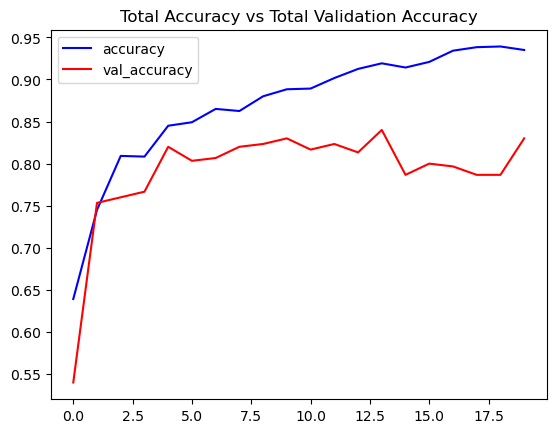

In [37]:
plot_metric(convlstm_model_training_history,'accuracy','val_accuracy','Total Accuracy vs Total Validation Accuracy')

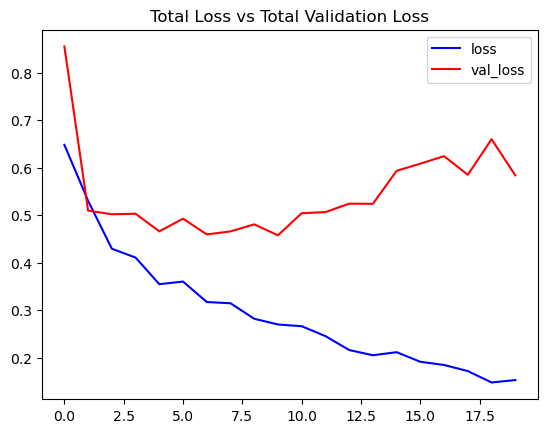

In [39]:
plot_metric(convlstm_model_training_history,'loss','val_loss','Total Loss vs Total Validation Loss')

In [45]:
from tensorflow.keras.regularizers import l2

In [47]:
def create_LRCN_model():
  '''
  This function will construct the required LRCN model.
  Returns:
   Model:It is the required constructed LRCN model.
  '''

  # We will use a Sequential model for model construction
  model=Sequential()

  # Model Architecture
  model.add(TimeDistributed(Conv2D(16, (3,3), padding='same' ,activation = 'relu'),input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH,3)))
  model.add(TimeDistributed(MaxPooling2D((4,4))))
  model.add(TimeDistributed(Dropout(0.3)))

  model.add(TimeDistributed(Conv2D(32,(3,3),padding='same',activation='relu',kernel_regularizer=l2(0.001))))
  model.add(TimeDistributed(MaxPooling2D((4,4))))
  model.add(TimeDistributed(Dropout(0.3)))

  model.add(TimeDistributed(Conv2D(64,(3,3),padding='same',activation='relu',kernel_regularizer=l2(0.001))))
  model.add(TimeDistributed(MaxPooling2D((2,2))))
  model.add(TimeDistributed(Dropout(0.3)))

  model.add(TimeDistributed(Conv2D(64,(3,3),padding='same',activation='relu',kernel_regularizer=l2(0.001))))
  model.add(TimeDistributed(MaxPooling2D((2,2))))
  model.add(TimeDistributed(Dropout(0.3)))  

  model.add(TimeDistributed(Flatten()))    

  #model.add(LSTM(64))  
  model.add(LSTM(64, return_sequences=False, dropout=0.3, recurrent_dropout=0.3))


  model.add(Dense(len(CLASSES_LIST),activation='softmax'))          
  # Display the models summary
  model.summary()

  return model

In [49]:
#Construct the required LRCN model

LRCN_model = create_LRCN_model()


#Display the success message.
print("Model Created Successfully!")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_7              │ (None, 20, 64, 64, 16) │           448 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_8              │ (None, 20, 16, 16, 16) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_9              │ (None, 20, 16, 16, 16) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_10             │ (None, 20, 16, 16, 32) │         4,640 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_11             │ (None, 20, 4, 4, 32)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_12             │ (None, 20, 4, 4, 32)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_13             │ (None, 20, 4, 4, 64)   │        18,496 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_14             │ (None, 20, 2, 2, 64)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_15             │ (None, 20, 2, 2, 64)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_16             │ (None, 20, 2, 2, 64)   │        36,928 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_17             │ (None, 20, 1, 1, 64)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_18             │ (None, 20, 1, 1, 64)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_19             │ (None, 20, 64)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,666 (365.88 KB)

 Trainable params: 93,666 (365.88 KB)

 Non-trainable params: 0 (0.00 B)

Model Created Successfully!


In [89]:
#Plot te structure of the constructed LRCN model
plot_model(LRCN_model,to_file = 'LRCN_model_structure_plot.png', show_shapes = True, show_layer_names = True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [51]:
#Create an Instance of early stopping callback
early_stopping_callback=EarlyStopping(monitor='val_loss' , patience=15 , mode='min' , restore_best_weights=True)

#Compile the model and specify loss function,optimizer and metrices to the model
LRCN_model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=["accuracy"])

#Start training the model.
LRCN_model_training_history=LRCN_model.fit(x=features_train, y=labels_train, epochs=70, batch_size=4, shuffle=True, validation_split=0.2, callbacks=[early_stopping_callback])

Epoch 1/70
300/300 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.5147 - loss: 0.8049 - val_accuracy: 0.5067 - val_loss: 0.7447
Epoch 2/70
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 94ms/step - accuracy: 0.5036 - loss: 0.7362 - val_accuracy: 0.4933 - val_loss: 0.7161
Epoch 3/70
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 93ms/step - accuracy: 0.4647 - loss: 0.7142 - val_accuracy: 0.5033 - val_loss: 0.7038
Epoch 4/70
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 94ms/step - accuracy: 0.5065 - loss: 0.7023 - val_accuracy: 0.5133 - val_loss: 0.6954
Epoch 5/70
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 94ms/step - accuracy: 0.5407 - loss: 0.6982 - val_accuracy: 0.5600 - val_loss: 0.6850
Epoch 6/70
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 94ms/step - accuracy: 0.5445 - loss: 0.6842 - val_accuracy: 0.6067 - val_loss: 0.6689
Epoch 7/70
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 95ms/step - accuracy: 0.6237 - loss: 0.6798 - val_accuracy: 0.6267 - val_loss: 0.6648
Epoch 8/70
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 93ms/step - accuracy: 0.6746 - loss: 0.6585 - 

In [53]:
# Now evaluate the model
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.8555 - loss: 0.4105


In [55]:
def plot_metric(model_training_history,metric_name_1,metric_name_2,plot_name):
    '''This function will plot the metrics passed to it in a graph'''
    
    #Get metrics values using metric names as identifiers.
    metric_value_1=model_training_history.history[metric_name_1]
    metric_value_2=model_training_history.history[metric_name_2]
    
    #Construct a range of object which will be used as X axis of the graph
    epochs=range(len(metric_value_1))
    
    #Plot the graph
    plt.plot(epochs,metric_value_1,'blue',label=metric_name_1)
    plt.plot(epochs,metric_value_2,'red', label=metric_name_2)
    
    plt.title(str(plot_name))
    plt.legend()
    plt.show()

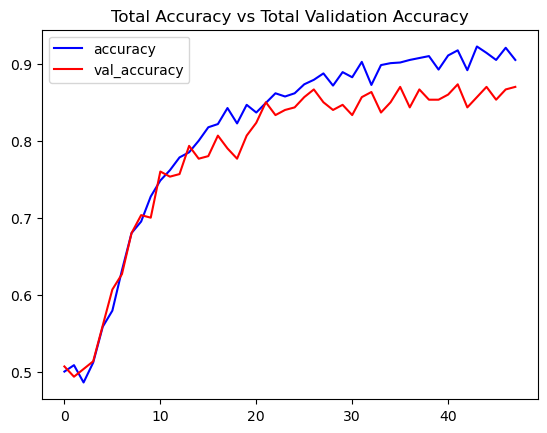

In [57]:
plot_metric(LRCN_model_training_history,'accuracy','val_accuracy','Total Accuracy vs Total Validation Accuracy')

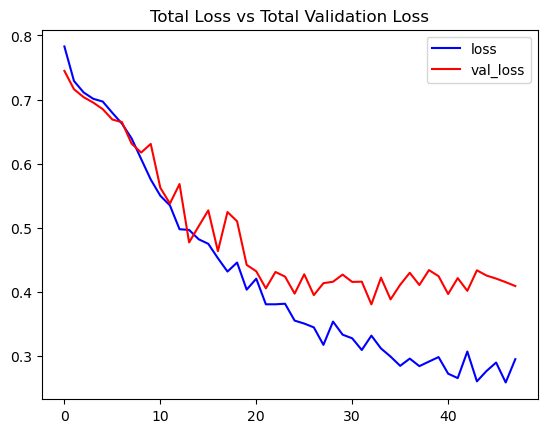

In [59]:
plot_metric(LRCN_model_training_history,'loss','val_loss','Total Loss vs Total Validation Loss')

In [61]:
#Save the model
#Get the loss and accuracy from model_evaluation_history.
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history

#Define the string date format
#Get the current date and time in Datetime object
#Convert the DateTime  objectto string according to the style mentioned in date_time_format string.
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)

#Define a useful name for our  model to make it easy for us while navigating through multiple saved models.
model_file_name = f'LRCN_model__Date_Time_{current_date_time_string}__Loss_{model_evaluation_loss}__Accuracy_{model_evaluation_accuracy}.h5'

#Save the model
LRCN_model.save(model_file_name)

In [171]:
print("Model Input Shape:", LRCN_model.input_shape)


Model Input Shape: (None, 20, 64, 64, 3)


In [63]:
def predict_on_video(video_file_path,SEQUENCE_LENGTH):
    video_reader=cv2.VideoCapture(video_file_path)
    
    # Get the width and height of the video
    original_video_width=int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height=int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
    print("Original video width and height",original_video_width,original_video_height)
    
    #Declare a list to store video frames we will extract
    frames_list=[]
    
    #Initialize a variable to store the predicted action being performed in the video
    predicted_class_name=''
    
    # Get the number of frames in the video
    video_frames_count=int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # CAlculate the interval after which frames will be added to the list
    skip_frames_window=max(int(video_frames_count/SEQUENCE_LENGTH),1)
    
    #Iterating the number of times equal to the fixed length of sequence
    for frame_counter in range(SEQUENCE_LENGTH):
        
        # Set the current frame position of the video
        video_reader.set(cv2.CAP_PROP_POS_FRAMES,frame_counter*skip_frames_window)
        
        # Read a frame
        success, frame=video_reader.read()
        
        if not success:
            break
        
        # Resize the frame to fixed dimensions
        resized_frame=cv2.resize(frame,(IMAGE_HEIGHT,IMAGE_WIDTH))
        
        normalized_frame=resized_frame/255
        
        # Appending the pre-processed frame into the lsit
        frames_list.append(normalized_frame)


    print("Shape of frames_list before conversion:", np.array(frames_list).shape)

        
    #Passing the frames to the mmodel
    predicted_labels_probabilities=LRCN_model.predict(np.expand_dims(frames_list,axis=0))[0]
    
    predicted_label=np.argmax(predicted_labels_probabilities)
    
    predicted_class_name=CLASSES_LIST[predicted_label]
    
    #Display the predicted action along with the prediction confidence
    print(f'Action Predicted:{predicted_class_name}\nConfidence:{predicted_labels_probabilities[predicted_label]}')
    
    video_reader.release()

In [67]:
from IPython.display import Video

In [69]:
pwd

'/Users/durbadalbhowmik/Mini Project'

In [71]:
input_video_file_path=f'Testing_Dataset/fighting2.mp4'

predict_on_video(input_video_file_path,SEQUENCE_LENGTH)

#Display the input video
clip=VideoFileClip(input_video_file_path,audio=False,target_resolution=(300,None))
clip.write_videofile('Result/output.mp4')
Video('Result/output.mp4')

Original video width and height 480 848
Shape of frames_list before conversion: (20, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Action Predicted:Violence
Confidence:0.8695212602615356
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'mp42', 'minor_version': '0', 'compatible_brands': 'mp42isom'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [480, 848], 'bitrate': 1463, 'fps': 30.0, 'codec_name': 'h264', 'profile': '(Baseline)', 'metadata': {'Metadata': '', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 62, 'metadata': {'Metadata': '', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 20.23, 'bitrate': 1529, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(Baseline)', 'video_si

MoviePy - Done !
MoviePy - video ready Result/output.mp4


In [1]:
%%writefile app.py

import streamlit as st

st.title("Hello, Streamlit in Jupyter!")
st.write("This is a Streamlit app running from Jupyter Notebook.")


Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501